In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('data/5/train.csv')
# X_train as the matrix of features except the column yield and id
X_train = train_data.iloc[:, 1:-1].values

# Y_train as the vector of the yield column
Y_train = train_data.iloc[:, -1].values

$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

In [3]:

def OLS(X, y):
    # Add intercept term (column of ones)
    X = np.c_[np.ones(X.shape[0]), X]
    # Calculate OLS estimates using normal equation
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

In [4]:
test_data = pd.read_csv('data/5/test.csv')
id_test = test_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values

def test(X_test = X_test):
    beta = OLS(X_train, Y_train)
    # Add intercept term to X_test to match X_train
    X_test_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]
    Y_pred = X_test_with_intercept @ beta
    return Y_pred

Y_pred = test()
submission = pd.DataFrame({'id': id_test, 'y': Y_pred})
submission.to_csv('5_submission.csv', index=False)

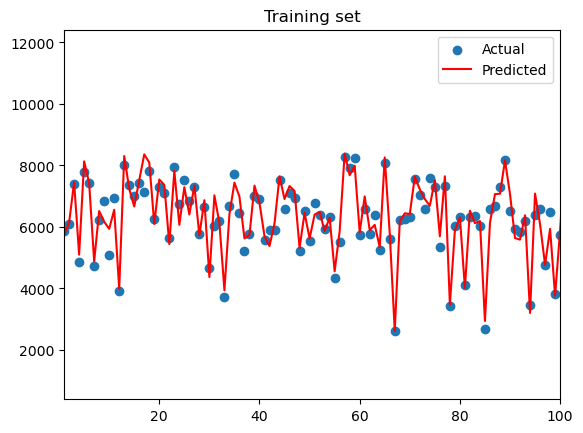

In [5]:
def plot_predictions(y_true, y_pred, title):
    X = np.arange(len(y_true))
    plt.xlim(1,100)
    plt.scatter(X, y_true, label='Actual')
    plt.plot(X, y_pred, color='red', label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()
    
plot_predictions(Y_train, test(X_train), 'Training set')

Mean Absolute Error on Training Set: 366.0229


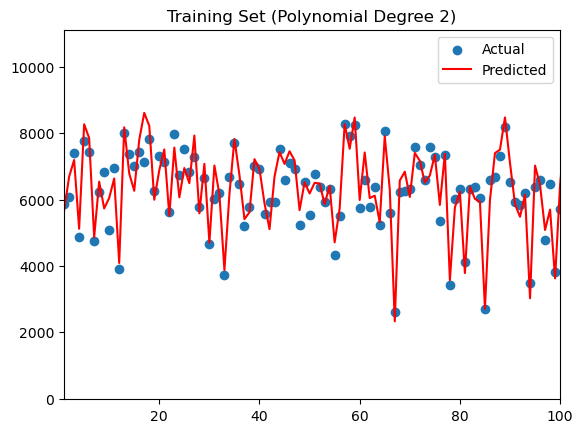

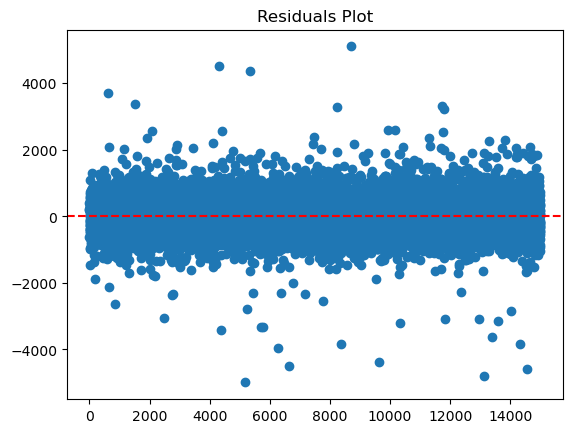

Predictions for Test Set:
[5000.8432376  6788.93143723 5956.16899865 ... 7819.45529026 7520.42786371
 4383.7629633 ]


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the training data
train_data = pd.read_csv('data/5/train.csv')

# Extract the features (X_train) and the target variable (Y_train)
X_train = train_data.iloc[:, 1:-1].values
Y_train = train_data.iloc[:, -1].values

# Load the test data
test_data = pd.read_csv('data/5/test.csv')
id_test = test_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values

# Feature Extraction: Manual Polynomial Features
def add_polynomial_features(X, degree=2):
    # Start with the original featurOLSOLSOLSes
    poly_features = X.copy()
    
    # Generate polynomial features
    for d in range(2, degree + 1):  # From 2nd degree to 'degree'
        poly_features = np.hstack((poly_features, X ** d))
    
    return poly_features

# OLS (Ordinary Least Squares) implementation
def OLS(X, y):
    # Add an intercept term (a column of ones)
    X = np.c_[np.ones(X.shape[0]), X]
    # Compute the OLS estimates using the normal equation
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

# Function to predict using the OLS model
def test(X_test, beta):
    # Add intercept term to X_test to match the form of X_train
    X_test_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]
    # Make predictions
    Y_pred = X_test_with_intercept @ beta
    return Y_pred

# Plot the actual vs predicted values
def plot_predictions(y_true, y_pred, title):
    X = np.arange(len(y_true))  # Generate an array for plotting on X-axis
    plt.xlim(1, 100)  # Set the X-axis limits
    plt.scatter(X, y_true, label='Actual')  # Plot actual values
    plt.plot(X, y_pred, color='red', label='Predicted')  # Plot predicted values
    plt.title(title)
    plt.legend()
    plt.show()

# Residual Plot Function (for Residual Analysis)
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    plt.scatter(np.arange(len(residuals)), residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals Plot')
    plt.show()

# If you want to evaluate the model, you can calculate the Mean Absolute Error (MAE) from scratch
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

### MAIN EXECUTION ###
# Add polynomial features (for feature extraction) without sklearn
degree = 2  # You can increase this to try higher-degree polynomials
X_train_poly = add_polynomial_features(X_train, degree=degree)
X_test_poly = add_polynomial_features(X_test, degree=degree)

# Fit the OLS model with the extended polynomial features
beta_poly = OLS(X_train_poly, Y_train)

# Predict on the training set
Y_train_pred = test(X_train_poly, beta_poly)

# Calculate and print the MAE for the training set
mae_train = MAE(Y_train, Y_train_pred)
print(f"Mean Absolute Error on Training Set: {mae_train:.4f}")

# Plot the actual vs predicted values for the training set
plot_predictions(Y_train, Y_train_pred, 'Training Set (Polynomial Degree 2)')

# Plot the residuals for the training set
plot_residuals(Y_train, Y_train_pred)

# Predict on the test set
Y_pred_test = test(X_test_poly, beta_poly)

# Save the predictions to a CSV file in the submission format
submission = pd.DataFrame({'id': id_test, 'y': Y_pred_test})
submission.to_csv('5_submission_polynomial.csv', index=False)

# Print the predictions for the test set
print("Predictions for Test Set:")
print(Y_pred_test)


28 28
10000
[1.00000000e+00 6.39000000e+02 2.50000000e+01 5.00000000e-01
 2.50000000e-01 7.50000000e-01 6.30000000e-01 9.46000000e+01
 5.72000000e+01 7.90000000e+01 6.82000000e+01 3.30000000e+01
 5.59000000e+01 3.40000000e+01 5.60000000e-01 4.02948430e-01
 4.09260571e-01 3.12745905e+01 6.25000000e+02 3.13600000e-01
 1.62367437e-01 1.67494215e-01 9.78100013e+02 1.56250000e+04
 1.75616000e-01 6.54257039e-02 6.85487781e-02 3.05896774e+04]
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


/tmp/ipykernel_13046/17758725.py:57: RuntimeWarning: invalid value encountered in scalar divide
  Y_pred[i] = np.dot(K, Y_train) / K_sum


0.0
0.0
0.0
erro
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
erro
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
erro
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
erro
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
erro
0.0
0.0
erro
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
erro
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0

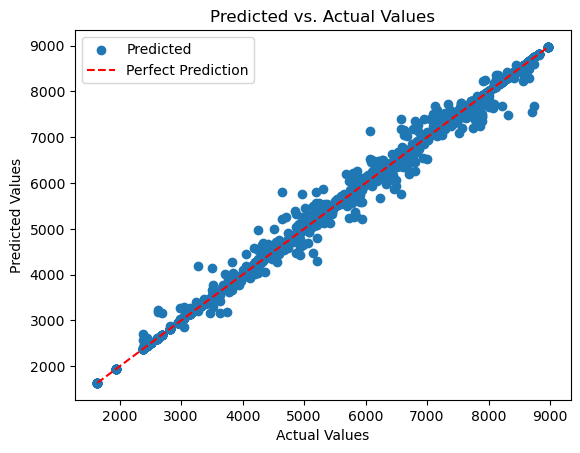

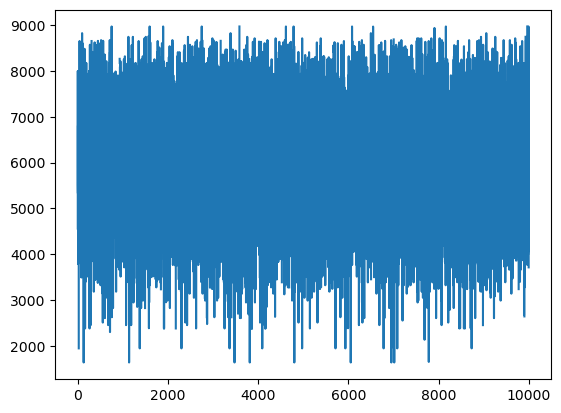

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
train_data = pd.read_csv('data/5/train.csv')
test_data = pd.read_csv('data/5/test.csv')

# Extract features and labels from the training set
X_train = train_data.iloc[:, 1:-1].values
Y_train = train_data.iloc[:, -1].values

# Extract features from the test set
X_test = test_data.iloc[:, 1:].values
id_test = test_data.iloc[:, 0].values

# features = ['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']
features = ['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']

# features = ['fruitset', 'fruitmass', 'seeds', 'clonesize', 'RainingDays','MaxOfUpperTRange']
# f_taken = ['fruitset', 'fruitmass', 'seeds', 'clonesize','MaxOfUpperTRange']
f_taken = ['clonesize', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']
# features = f_taken
# f_taken = features

def X_creator(train_data):
    #also add constant term in each row
    d1 =  np.c_[train_data[features].values, train_data[f_taken].values**2, train_data[f_taken].values**3]
    #c1 has 1 train data times
    c1 = np.ones((len(train_data),1))
    return np.hstack((c1,d1))
X_train = X_creator(train_data)
X_test = X_creator(test_data)
print(len(X_train[0]),len(X_test[0]))
print(len(X_test))
print(X_train[0])
# Efficient kernel regression (without full matrix storage)
def kernel_regression_efficient(X_train, Y_train, X_test, gamma=0.1):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    Y_pred = np.zeros(n_test)
    
    # Iterate over test data points
    for i in range(n_test):
        x_test = X_test[i, :]
        
        # Calculate the RBF kernel (without storing the full matrix)
        K = np.exp(-gamma * np.sum((X_train - x_test) ** 2, axis=1))
        if(K[0]!=0):
            print(K[0])
        print(K[0])
        # Handle case where sum of weights is zero
        K_sum = np.sum(K)
        if(K_sum == 0):
            print("erro")
        # Perform weighted sum of training outputs using the kernel
        Y_pred[i] = np.dot(K, Y_train) / K_sum
    
    return Y_pred

# Mean Absolute Error (MAE) from scratch
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Test the efficient Kernel Regression model

def test_kernel_regression_efficient(X_train, Y_train, X_test, gamma=0.1):
    return kernel_regression_efficient(X_train, Y_train, X_test, gamma)

# Plot predictions for visualization
def plot_predictions(y_true, y_pred, title):
    plt.scatter(y_true, y_pred, alpha=1, label='Predicted')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle='--', color='red', label='Perfect Prediction')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs. Actual Values')
    plt.legend()
    plt.show()

Y_pred_kernel = test_kernel_regression_efficient(X_train, Y_train, X_train, gamma=0.1)

# Calculate MAE for Kernel Regression
mae_kernel = mean_absolute_error(Y_train, Y_pred_kernel)
print(f"Mean Absolute Error (Kernel Regression): {mae_kernel:.4f}")

# Final prediction for test set
Y_pred_test_kernel = test_kernel_regression_efficient(X_train, Y_train, X_test, gamma=0.1)
# Save predictions for Kernel Regression
submission_kernel = pd.DataFrame({'id': id_test, 'y': Y_pred_test_kernel})
submission_kernel.to_csv('Kernel_submission.csv', index=False)

# Plot Kernel Regression predictions vs actuals
plot_predictions(Y_train, Y_pred_kernel, 'Kernel Regression - Training Set')
plt.plot(Y_pred_test_kernel)


Mean Absolute Error (MAE) on test data: 871.8798


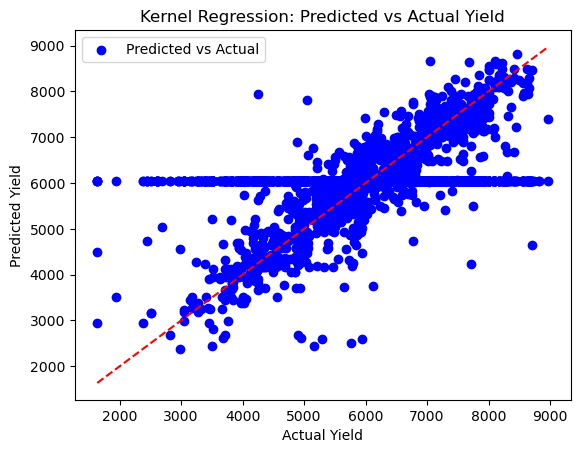

Test vs Predicted values plot saved as 'kernel_regression_actual_vs_pred.png'.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
train_data = pd.read_csv('data/5/train.csv')

# Extract features and labels from the dataset
features = ['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']

# features = ['fruitset', 'fruitmass', 'seeds', 'clonesize', 'RainingDays','MaxOfUpperTRange']
# f_taken = ['fruitset', 'fruitmass', 'seeds', 'clonesize','MaxOfUpperTRange']
f_taken = ['clonesize', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']
# features = f_taken
# f_taken = features

def X_creator(train_data):
    #also add constant term in each row
    d1 =  np.c_[train_data[features].values, train_data[f_taken].values**2, train_data[f_taken].values**3]
    #c1 has 1 train data times
    c1 = np.ones((len(train_data),1))
    return np.hstack((c1,d1))
X = X_creator(train_data)  # Features from the dataset (excluding 'id' and 'yield')
Y = train_data['yield'].values  # Target values (yield)

# Define the Gaussian (RBF) kernel function
def gaussian_kernel(x, x_i, bandwidth):
    """
    Computes the Gaussian (RBF) kernel between a point x and a data point x_i with a given bandwidth.
    
    Parameters:
    - x: A single data point or a set of data points (e.g., a row in the feature matrix).
    - x_i: A data point from the training set.
    - bandwidth: The kernel bandwidth (smoothing parameter).
    
    Returns:
    - Kernel value as a scalar.
    """
    distance = np.linalg.norm(x - x_i)
    return np.exp(-distance**2 / (2 * bandwidth**2))

# Implement Kernel Regression (Nadaraya-Watson Estimator) with regularization
def kernel_regression(X_train, Y_train, X_test, bandwidth, reg=1e-8):
    """
    Performs Kernel Regression using the Nadaraya-Watson Estimator with regularization to avoid division by zero.
    
    Parameters:
    - X_train: Training feature matrix.
    - Y_train: Target values corresponding to X_train.
    - X_test: Test feature matrix for which we predict the target values.
    - bandwidth: The bandwidth (smoothing parameter) for the kernel function.
    - reg: Small constant to prevent division by zero (regularization).
    
    Returns:
    - Predicted values for X_test.
    """
    Y_pred = np.zeros(len(X_test))  # Initialize predicted values

    # Iterate through each test sample
    for i, x_test in enumerate(X_test):
        # Calculate weights using the kernel function for all training points
        weights = np.array([gaussian_kernel(x_test, x_train, bandwidth) for x_train in X_train])
        
        # Weighted sum for prediction
        numerator = np.sum(weights * Y_train)
        denominator = np.sum(weights)

        # Regularize the denominator to avoid division by zero
        if denominator > 0:
            Y_pred[i] = numerator / denominator
        else:
            # If the denominator is zero (no influence), fall back to the mean of the target values
            Y_pred[i] = np.mean(Y_train)
    
    return Y_pred

# Split data into 80% training and 20% testing
def train_test_split(X, Y, test_size=0.2):
    """
    Manually splits the data into training and test sets.
    
    Parameters:
    - X: Features matrix.
    - Y: Labels vector.
    - test_size: Proportion of data to be used as test set.
    
    Returns:
    - X_train, X_test, Y_train, Y_test: Split datasets.
    """
    n = len(X)
    indices = np.arange(n)
    np.random.shuffle(indices)  # Shuffle the indices to randomize the split

    split_point = int(n * (1 - test_size))
    train_indices, test_indices = indices[:split_point], indices[split_point:]

    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = Y[train_indices], Y[test_indices]

    return X_train, X_test, Y_train, Y_test

# Function to calculate Mean Absolute Error (MAE)
def mean_absolute_error(y_true, y_pred):
    """
    Calculates the Mean Absolute Error (MAE) between the true and predicted values.
    
    Parameters:
    - y_true: Actual target values.
    - y_pred: Predicted target values.
    
    Returns:
    - MAE: Mean Absolute Error.
    """
    return np.mean(np.abs(y_true - y_pred))

# Split the data (80% for training, 20% for testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Choose a bandwidth (this can be tuned using cross-validation)
bandwidth = 0.5

# Train the model on the training data and predict on the test data
Y_pred = kernel_regression(X_train, Y_train, X_test, bandwidth)

# Calculate and print the Mean Absolute Error (MAE) for the test set
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error (MAE) on test data: {mae:.4f}")

# Optional: Visualization of predictions vs actual values (if needed)
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Kernel Regression: Predicted vs Actual Yield')
plt.legend()
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.savefig('kernel_regression_actual_vs_pred.png')
plt.show()

print("Test vs Predicted values plot saved as 'kernel_regression_actual_vs_pred.png'.")
